# Load spectra and matrices ( lsm )

In [1]:
# Import auxiliary libraries for demonstration

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import warnings

plt.rcParams[ "figure.figsize" ] = [ 5, 4 ]

plt.rcParams[ "figure.dpi" ] = 80
plt.rcParams[ "font.family" ] = "Times New Roman"
plt.rcParams[ "font.size" ] = '14'

# Filter the plot warning
warnings.filterwarnings( "ignore" )

## Wave spectra

### Jonswap Spectrum

The Jonswap spectrum can be expressed,

$$
S(\omega) = \frac{\alpha g^2}{\omega^5} \exp{\left[ -\beta \left( \frac{\omega_p}{\omega} \right) \right]} \gamma^r
$$

$$
r = \exp{\left[ -\frac{(\omega - \omega_p)^2}{ 2 \sigma^2 \omega_p^2 } \right]}
$$

where $\omega$ is the wave frequency; $\omega_p$ is the peak frequency; $\alpha$ is the intensity of the spectrum, default value = 0.0081; $\beta$ is the shape factor, default value = 1.25; $\gamma$ is the peak enhancement factor, default value = 3.3; $g$ is the acceleration due to gravity, default value = 9.81.

Usually, the input paramters can be determined by the following equation from the JONSWAP experiment,

$$
\omega_p = 22 \left( \frac{g^2}{U_w F} \right) ^ {1/3}
$$

where $U_w$ is the wind speed at 10m above the sea surface; $F$ is the distance from a lee shore.

$$
\alpha = 0.076 \left( \frac{ U_w^2}{g F} \right)^{0.22}
$$

where $\omega_p$ is the peak frequency; $U_w$ is the wind speed at 10m above the sea surface.

$$
\beta = \frac{5}{4}
$$

$$
\gamma = 3.3
$$

Function `jonswapSpectrum` implements the Jonswap sepctrum.

Reference: 
* Hasselmann, K., Barnett, T.P., Bouws, E., Carlson, H., Cartwright, D.E., Enke, K., Ewing, J.A., Gienapp, A., Hasselmann, D.E., Kruseman, P. and Meerburg, A., 1973. Measurements of wind-wave growth and swell decay during the Joint North Sea Wave Project (JONSWAP). Ergaenzungsheft zur Deutschen Hydrographischen Zeitschrift, Reihe A.

#### Function help

In [2]:
from ffpack.lsm import jonswapSpectrum
help( jonswapSpectrum )

Help on function jonswapSpectrum in module ffpack.lsm.waveSpectra:

jonswapSpectrum(w, wp, alpha=0.0081, beta=1.25, gamma=3.3, g=9.81)
    JONSWAP (Joint North Sea Wave Project) spectrum is an empirical relationship 
    that defines the distribution of energy with frequency within the ocean.
    
    Parameters
    ----------
    w: scalar
        Wave frequency.
    wp: scalar
        Peak wave frequency.
    alpha: scalar, optional
        Intensity of the Spectra.
    beta: scalar, optional
        Shape factor, fixed value 1.25.
    gamma: scalar, optional
        Peak enhancement factor.
    g: scalar, optional
        Acceleration due to gravity, a constant.
        9.81 m/s2 in SI units.
    
    Returns
    -------
    rst: scalar
        The wave spectrum density value at wave frequency w.
    
    Raises
    ------
    ValueError
        If w is not a scalar.
        If wp is not a scalar.
    
    Examples
    --------
    >>> from ffpack.lsm import jonswapSpectrum
    >>> 

#### Example with default values

In [3]:
jsfRange = np.linspace( 0.0, 1.2, num=121 )

In [4]:
wp = 0.51
jsfResults = [ jonswapSpectrum( w, wp ) for w in jsfRange ]

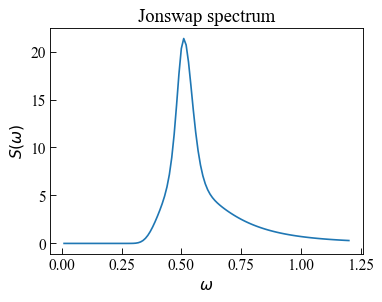

In [5]:
fig, ax = plt.subplots()

ax.plot( np.array( jsfRange ),
         np.array( jsfResults ) )

ax.tick_params(axis='x', direction="in", length=5)
ax.tick_params(axis='y', direction="in", length=5)
ax.set_ylabel( "$S(\omega)$" )
ax.set_xlabel( "$\omega$" )
ax.set_title( "Jonswap spectrum" )

plt.tight_layout()
plt.show()

### Pierson Moskowitz Spectrum

The Pierson Moskowitz spectrum can be expressed,

$$
S(\omega) = \frac{\alpha g^2}{\omega^5} \exp{\left[ -\beta \left( \frac{\omega_0}{\omega} \right) \right]} \gamma^r
$$

where $\alpha$ is the intensity of the spectrum, default value = 0.0081; $\beta$ is the shape factor, default value = 0.74.

$$
\omega_0 = \frac{g}{U_w}
$$

where $g$ is the acceleration due to gravity, default value = 9.81; $U_w$ is the wind speed at 19.5m above the sea surface.

Reference: 

* Pierson Jr, W.J. and Moskowitz, L., 1964. A proposed spectral form for fully developed wind seas based on the similarity theory of SA Kitaigorodskii. Journal of geophysical research, 69(24), pp.5181-5190.

#### Function help

In [6]:
from ffpack.lsm import piersonMoskowitzSpectrum
help( piersonMoskowitzSpectrum )

Help on function piersonMoskowitzSpectrum in module ffpack.lsm.waveSpectra:

piersonMoskowitzSpectrum(w, Uw, alpha=0.0081, beta=0.74, g=9.81)
    Pierson Moskowitz spectrum is an empirical relationship 
    that defines the distribution of energy with frequency within the ocean.
    
    Parameters
    ----------
    w: scalar
        Wave frequency.
    Uw: scalar
        Wind speed at a height of 19.5m above the sea surface.
    alpha: scalar, optional
        Intensity of the Spectra.
    beta: scalar, optional
        Shape factor.
    g: scalar, optional
        Acceleration due to gravity, a constant.
        9.81 m/s2 in SI units.
    
    Returns
    -------
    rst: scalar
        The wave spectrum density value at wave frequency w.
    
    Raises
    ------
    ValueError
        If w is not a scalar.
        If wp is not a scalar.
    
    Examples
    --------
    >>> from ffpack.lsm import piersonMoskowitzSpectrum
    >>> w = 0.51
    >>> Uw = 20
    >>> rst = piersonMosk

#### Example with default values

In [7]:
pmsfRange = np.linspace( 0.0, 1.2, num=121 )

In [8]:
Uw = 20
pmsfResults = [ piersonMoskowitzSpectrum( w, Uw ) for w in pmsfRange ]

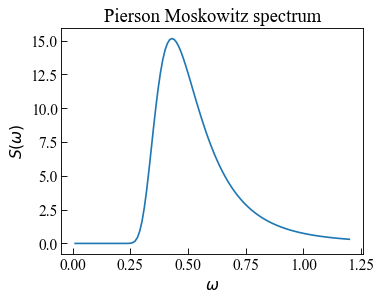

In [9]:
fig, ax = plt.subplots()

ax.plot( np.array( pmsfRange ),
         np.array( pmsfResults ) )

ax.tick_params(axis='x', direction="in", length=5)
ax.tick_params(axis='y', direction="in", length=5)
ax.set_ylabel( "$S(\omega)$" )
ax.set_xlabel( "$\omega$" )
ax.set_title( "Pierson Moskowitz spectrum" )

plt.tight_layout()
plt.show()

### ISSC spectrum

The ISSC spectrum, also known as Bretschneider or modified Pierson-Moskowitz, can be expressed,

$$
S(\omega) = \frac{5}{16} \frac{Hs^{2} \omega_{p}^{4}}{\omega^5} \exp{\left[ -\frac{5}{4} \left( \frac{\omega_p}{\omega} \right)^{4} \right]}
$$

where $\omega$ is the wave frequency; $\omega_p$ is the peak frequency; $Hs$ is the significant wave height.

Function `isscSpectrum` implements the ISSC sepctrum.

Reference: 

* Guidance Notes on Selecting Design Wave by Long Term Stochastic Method

#### Function help

In [10]:
from ffpack.lsm import isscSpectrum
help( isscSpectrum )

Help on function isscSpectrum in module ffpack.lsm.waveSpectra:

isscSpectrum(w, wp, Hs)
    ISSC spectrum, also known as Bretschneider or modified Pierson-Moskowitz. 
    
    Parameters
    ----------
    w: scalar
        Wave frequency.
    wp: scalar
        Peak wave frequency.
    Hs: scalar
        Significant wave height.
    
    Returns
    -------
    rst: scalar
        The wave spectrum density value at wave frequency w.
    
    Raises
    ------
    ValueError
        If w is not a scalar.
        If wp is not a scalar.
        If Hs is not a scalar.
    
    Examples
    --------
    >>> from ffpack.lsm import isscSpectrum
    >>> w = 0.02
    >>> wp = 0.51
    >>> Hs = 20
    >>> rst = isscSpectrum( w, wp, Hs )



#### Example with default values

In [11]:
isfRange = np.linspace( 0.0, 1.2, num=121 )

In [12]:
wp = 0.51
Hs = 20
isfResults = [ isscSpectrum( w, wp, Hs ) for w in isfRange ]

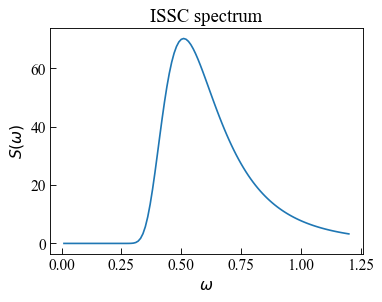

In [13]:
fig, ax = plt.subplots()

ax.plot( np.array( isfRange ),
         np.array( isfResults ) )

ax.tick_params(axis='x', direction="in", length=5)
ax.tick_params(axis='y', direction="in", length=5)
ax.set_ylabel( "$S(\omega)$" )
ax.set_xlabel( "$\omega$" )
ax.set_title( "ISSC spectrum" )

plt.tight_layout()
plt.show()

### Gaussian Swell spectrum

The Gaussian Swell spectrum is typically used to model long period swell sea, and can be expressed,

$$
S(\omega) = \frac{(Hs/4)^{2}}{2\pi \delta \sqrt{2\pi}} \exp{\left[ -\frac{ (\omega - \omega_p) ^{2} }{ 2(2\pi \delta)^{2} } \right]}
$$

where $\omega$ is the wave frequency; $\omega_p$ is the peak frequency; $Hs$ is the significant wave height; $\delta$ is the peakedness parameter for Gaussian spectral width.

Function `gaussianSwellSpectrum` implements the ISSC sepctrum.

Reference: 

* Guidance Notes on Selecting Design Wave by Long Term Stochastic Method

#### Function help

In [14]:
from ffpack.lsm import gaussianSwellSpectrum
help( gaussianSwellSpectrum )

Help on function gaussianSwellSpectrum in module ffpack.lsm.waveSpectra:

gaussianSwellSpectrum(w, wp, Hs, sigma)
    Gaussian Swell spectrum, typically used to model long period 
    swell seas [Guidance2016A]_. 
    
    Parameters
    ----------
    w: scalar
        Wave frequency.
    wp: scalar
        Peak wave frequency.
    Hs: scalar
        Significant wave height.
    sigma: scalar
        peakedness parameter for Gaussian spectral width.
    
    Returns
    -------
    rst: scalar
        The wave spectrum density value at wave frequency w.
    
    Raises
    ------
    ValueError
        If w is not a scalar.
        If wp is not a scalar.
        If Hs is not a scalar.
        If sigma is not a scalar.
    
    Examples
    --------
    >>> from ffpack.lsm import gaussianSwellSpectrum
    >>> w = 0.02
    >>> wp = 0.51
    >>> Hs = 20
    >>> sigma = 0.07
    >>> rst = gaussianSwellSpectrum( w, wp, Hs, sigma )
    
    References
    ----------
    .. [Guidance2016A] G

#### Example with default values

In [15]:
gsfRange = np.linspace( 0.0, 1.2, num=121 )

In [16]:
wp = 0.51
Hs = 20
sigma = 0.07
gsfResults = [ gaussianSwellSpectrum( w, wp, Hs, sigma ) for w in gsfRange ]

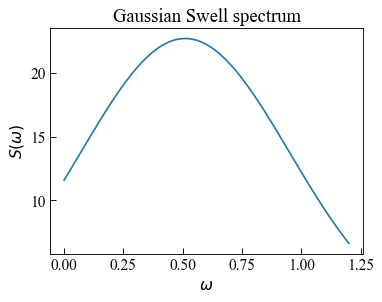

In [17]:
fig, ax = plt.subplots()

ax.plot( np.array( gsfRange ),
         np.array( gsfResults ) )

ax.tick_params(axis='x', direction="in", length=5)
ax.tick_params(axis='y', direction="in", length=5)
ax.set_ylabel( "$S(\omega)$" )
ax.set_xlabel( "$\omega$" )
ax.set_title( "Gaussian Swell spectrum" )

plt.tight_layout()
plt.show()

### Ochi-Hubble spectrum

The Ochi-Hubble 6-Parameter spectrum covers shapes of wave spectra associated with the growth and decay of a storm, including swells, and can be expressed,

$$
S(\omega) = \frac{1}{4} \sum_{j=1}^{2} \frac{ \left(  -\frac{4\lambda_j+1}{4} \omega_{pj}^{4} \right)^{\lambda_j}}{\Gamma(\lambda_j)} \frac{H_{sj}^{2}}{\omega^{4\lambda_j + 1}} \exp{\left[ -\frac{4\lambda_j+1}{4} \left( \frac{\omega_p}{\omega} \right)^4 \right]}
$$

where $j = 1, 2$ stands for lower (swell part) and higher (wind seas part) frequency components; $\omega$ is the wave frequency; $\omega_p$ is the peak frequency; the six parameters $H_{s1}, H_{s2}, \omega_{p1}, \omega_{p2}, \lambda_{1}, \lambda_{2}$ are determined numerically to minimize the
difference between theoretical and observed spectra.

The modal frequency of the first component, $\omega_{p1}$, must be less than that of the second, $\omega_{p2}$. The significant wave height of the first component, $H_{s1}$, should normally be greater than that of the second, $H_{s2}$, since most of the wave energy tends to be associated with the lower frequency component. 

Function `ochiHubbleSpectrum` implements the Jonswap sepctrum.

Reference: 

* Guidance Notes on Selecting Design Wave by Long Term Stochastic Method


#### Function help

In [18]:
from ffpack.lsm import ochiHubbleSpectrum
help( ochiHubbleSpectrum )

Help on function ochiHubbleSpectrum in module ffpack.lsm.waveSpectra:

ochiHubbleSpectrum(w, wp1, wp2, Hs1, Hs2, lambda1, lambda2)
    Ochi-Hubble spectrum covers shapes of wave spectra associated with the growth 
    and decay of a storm, including swells. [Guidance2016B]_. 
    
    Parameters
    ----------
    w: scalar
        Wave frequency.
    wp1, wp2: scalar
        Peak wave frequency.
    Hs1, Hs2: scalar
        Significant wave height.
    lambda1, lambda2: scalar
    
    Returns
    -------
    rst: scalar
        The wave spectrum density value at wave frequency w.
    
    Raises
    ------
    ValueError
        If w is not a scalar.
        If wp1 or wp2 is not a scalar.
        If Hs1 or Hs2 is not a scalar.
        If lambda1 or lambda2 is not a scalar.
        If wp1 is not smaller than wp2.
    
    Notes
    -----
    Hs1 should normally be greater than Hs2 since most of the wave energy tends to 
    be associated with the lower frequency component.
    
    Ex

#### Example with default values

In [19]:
ohfRange = np.linspace( 0.0, 1.2, num=121 )

In [20]:
wp1 = 0.4
wp2 = 0.51
Hs1 = 20
Hs2 = 15
lambda1 = 7
lambda2 = 10
ohfResults = [ ochiHubbleSpectrum( w, wp1, wp2, Hs1, Hs2, lambda1, lambda2 ) 
               for w in ohfRange ]

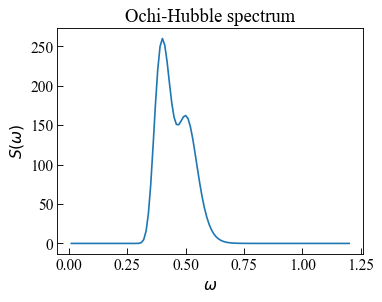

In [21]:
fig, ax = plt.subplots()

ax.plot( np.array( ohfRange ),
         np.array( ohfResults ) )

ax.tick_params(axis='x', direction="in", length=5)
ax.tick_params(axis='y', direction="in", length=5)
ax.set_ylabel( "$S(\omega)$" )
ax.set_xlabel( "$\omega$" )
ax.set_title( "Ochi-Hubble spectrum" )

plt.tight_layout()
plt.show()

### Wave spectra comparison

Note: 

- the shapes of the spectra are sensitive to the parameters
- some parameters are fixed in some spectra, and therefore the parameters should be close to the same case
- the curves below are adjusted to be similar by trying the parameters

In [22]:
waRange = np.linspace( 0.0, 1.2, num=121 )

In [23]:
wp = 0.51
jsfResults = [ jonswapSpectrum( w, wp, alpha=0.0081, beta=1.25, gamma=3.3, g=9.81 ) 
               for w in waRange ]

In [24]:
Uw = 25
pmsfResults = [ piersonMoskowitzSpectrum( w, Uw, alpha=0.0081, beta=1.25, g=9.81 ) 
                for w in waRange ]

In [25]:
wp = 0.51
Hs = 12
isfResults = [ isscSpectrum( w, wp, Hs ) for w in waRange ]

In [26]:
wp = 0.51
Hs = 12
sigma = 0.025
gsfResults = [ gaussianSwellSpectrum( w, wp, Hs, sigma ) for w in waRange ]

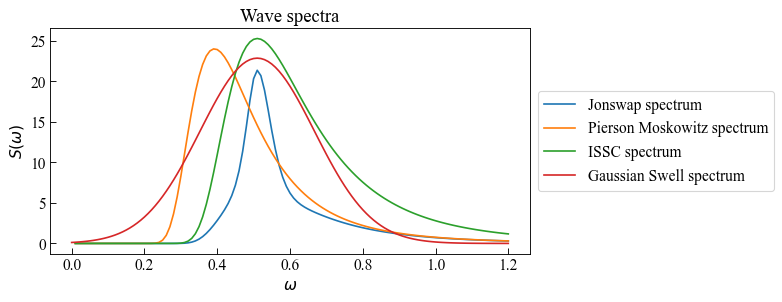

In [27]:
fig, ax = plt.subplots( figsize=(10, 4) )

ax.plot( np.array( jsfRange ),
         np.array( jsfResults ),
         label="Jonswap spectrum" )
ax.plot( np.array( pmsfRange ),
         np.array( pmsfResults ),
         label="Pierson Moskowitz spectrum" )
ax.plot( np.array( isfRange ),
         np.array( isfResults ),
         label="ISSC spectrum" )
ax.plot( np.array( gsfRange ),
         np.array( gsfResults ),
         label="Gaussian Swell spectrum" )

ax.tick_params(axis='x', direction="in", length=5)
ax.tick_params(axis='y', direction="in", length=5)
ax.set_ylabel( "$S(\omega)$" )
ax.set_xlabel( "$\omega$" )
ax.set_title( "Wave spectra" )

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

## Wind spectra

###  Davenport Spectrum with Drag Coefficient

The Davenport spectrum in the original paper by Davenport can be expressed,

$$
\frac{nS(n)}{\kappa \Delta_{1}^{2}} = 4.0 \frac{x^{2}}{(1 + x^{2})^{4/3}}
$$

$$
x = \frac{1200n}{\Delta_{1}}
$$

where $S(n)$ is the power spectrum density ( $m^2 s^{-2} Hz^{-1}$ ); $n$ is the frequency; $\Delta_{1}$ is the velocity ( $m/s$ ) at standard reference height of 10 $m$; $\kappa$ is the drag coefficient referred to mean velocity at 10 $m$, default value = 0.005. 

The normalized power spectrum density is defined as
$$
\frac{nS(n)}{\kappa \Delta_{1}^{2}}
$$

The normalized frequency is expressed as
$$
\frac{10n}{\Delta_{1}}
$$

The drag coefficient $\kappa$ is related to the surface type and some recommended values are given as


| Type of surface                                                                          | $\kappa$      |
| :--------------------------------------------------------------------------------------- | :------------ |
| Open unobstructed country <br /> (e.g., prairie-type grassland, arctic tundra, desert)          | 0.005         |
| Country broken by low clustered obstructions <br /> such as trees and houses$^*$ | 0.015 - 0.020 |
| Heavilly built-up urban centers with tall buildings                                      | 0.050         |

$^*$below 10 $m$ high

<br/>

Function `davenportSpectrumWithDragCoef` implements the Davenport spectrum in the original paper by Davenport.

Reference: 

* Davenport, A. G. (1961). The spectrum of horizontal gustiness near the ground in high winds. Quarterly Journal of the Royal Meteorological Society, 87(372), 194-211.

#### Function help

In [28]:
from ffpack.lsm import davenportSpectrumWithDragCoef
help( davenportSpectrumWithDragCoef )

Help on function davenportSpectrumWithDragCoef in module ffpack.lsm.windSpectra:

davenportSpectrumWithDragCoef(n, delta1, kappa=0.005, normalized=True)
    Davenport spectrum in the original paper by Davenport [Davenport1961]_.
    
    Parameters
    ----------
    n: scalar
        Frequency ( Hz ) when normalized=False.
        Normalized frequency when normalized=True.
    delta1: scalar
        Velocity ( m/s ) at standard reference height of 10 m.
    kappa: scalar, optional
        Drag coefficient referred to mean velocity at 10 m.  Default value 0.005 
        corresponding to open unobstructed country [Davenport1961]_.
        The recommended value for heavilly built-up urban centers with 
        tall buildings is 0.05. The recommended value for country broken by 
        low clustered obstructions is between 0.015 and 0.02. 
    normalized: bool, optional
        If normalized is set to False, the power spectrum density will be returned.
    
    Returns
    -------
    rs

#### Example with default values

In [29]:
dsnRange = [ 10**i for i in np.linspace( -3, 2, num=121 ) ]

In [30]:
delta1 = 10
dsnResults = [ davenportSpectrumWithDragCoef( n, delta1, normalized=True ) 
               for n in dsnRange ]

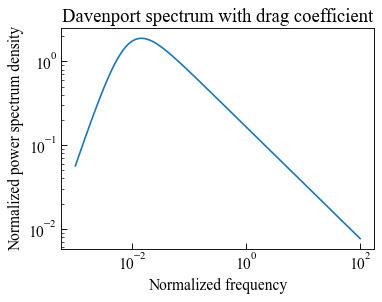

In [31]:
fig, ax = plt.subplots()
plt.xscale("log")
plt.yscale("log")

ax.plot( np.array( dsnRange ),
         np.array( dsnResults ) )

ax.tick_params(axis='x', direction="in", length=5)
ax.tick_params(axis='y', direction="in", length=5)
ax.tick_params(axis='x', direction="in", length=3, which='minor')
ax.tick_params(axis='y', direction="in", length=3, which='minor')
ax.set_xlabel( "Normalized frequency" )
ax.set_ylabel( "Normalized power spectrum density" )
ax.set_title( "Davenport spectrum with drag coefficient" )

plt.tight_layout()
plt.show()

In [32]:
dsnfRange = [ 10**i for i in np.linspace( -6, 1, num=181 ) ]

In [33]:
delta1 = 10
dsnfResults = [ davenportSpectrumWithDragCoef( n, delta1, normalized=False ) 
                for n in dsnfRange ]

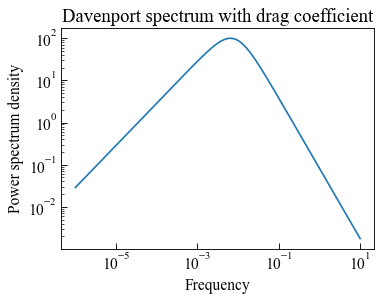

In [34]:
fig, ax = plt.subplots()
plt.xscale("log")
plt.yscale("log")

ax.plot( np.array( dsnfRange ),
         np.array( dsnfResults ) )

ax.tick_params(axis='x', direction="in", length=5)
ax.tick_params(axis='y', direction="in", length=5)
ax.tick_params(axis='x', direction="in", length=3, which='minor')
ax.tick_params(axis='y', direction="in", length=3, which='minor')
ax.set_xlabel( "Frequency" )
ax.set_ylabel( "Power spectrum density" )
ax.set_title( "Davenport spectrum with drag coefficient" )

plt.tight_layout()
plt.show()

###  Davenport Spectrum with Roughness Length

The Davenport spectrum in the paper by Hiriart et al. can be expressed,

$$
\frac{nS(n)}{u_{f}^{2}} = 4.0 \frac{x^{2}}{(1 + x^{2})^{4/3}}
$$

$$
x = \frac{1200n}{u_{f}}
$$

where $S(n)$ is the power spectrum density ( $m^2 s^{-2} Hz^{-1}$ ); $n$ is the frequency; $u_{f}$ is the friction velocity ( $m/s$ ); $u_{z}$ is the mean wind speed ( $m/s$ ) measured at height $z$; $z$ is the height above the ground, default value = 10 $m$; $z_{0}$ is the roughness length, default value = 0.03 $m$ corresponding to open exposure case in NIST database. 

The friction velocity $u_{f}$ is calculated as
$$
u_{f} = \frac{ku_{z}}{ln(z/z_{0})}
$$
where $k$ is the von Karman's constant and $k=0.4$.

The normalized power spectrum density is defined as
$$
\frac{nS(n)}{u_{f}^{2}}
$$

The normalized frequency is expressed as
$$
\frac{nz}{u_{f}}
$$

Function `davenportSpectrumWithRoughnessLength` implements the Davenport spectrum in the paper by Hiriart et al.

Reference: 

* Hiriart, D., Ochoa, J. L., & Garcia, B. (2001). Wind power spectrum measured at the San Pedro Mártir Sierra. Revista Mexicana de Astronomia y Astrofisica, 37(2), 213-220.
* Ho, T. C. E., Surry, D., & Morrish, D. P. (2003). NIST/TTU cooperative agreement-windstorm mitigation initiative: Wind tunnel experiments on generic low buildings. London, Canada: BLWTSS20-2003, Boundary-Layer Wind Tunnel Laboratory, Univ. of Western Ontario.

#### Function help

In [35]:
from ffpack.lsm import davenportSpectrumWithRoughnessLength
help( davenportSpectrumWithRoughnessLength )

Help on function davenportSpectrumWithRoughnessLength in module ffpack.lsm.windSpectra:

davenportSpectrumWithRoughnessLength(n, uz, z=10, z0=0.03, normalized=True)
    Davenport spectrum in the paper by Hiriart et al. [Hiriart2001]_.
    
    Parameters
    ----------
    n: scalar
        Frequency ( Hz ) when normalized=False.
        Normalized frequency when normalized=True.
    uz: scalar
        Mean wind speed ( m/s ) measured at height z.
    z: scalar, optional
        Height above the ground ( m ), default to 10 m. 
    z0: scalar, optional
        Roughness length ( m ), default to 0.03 m corresponding to open 
        exposure case in [Ho2003]_.
    normalized: bool, optional
        If normalized is set to False, the power spectrum density will be returned.
    
    Returns
    -------
    rst: scalar
        Power spectrum density ( m^2 s^-2 Hz^-1 ) when normalized=False.
        Normalized power spectrum density when normalized=True.
    
    Raises
    ------
    Value

#### Example with default values

In [36]:
dsrnRange = [ 10**i for i in np.linspace( -3, 2, num=121 ) ]

In [37]:
uz = 10
dsrnResults = [ davenportSpectrumWithRoughnessLength( n, uz, normalized=True ) 
                for n in dsrnRange ]

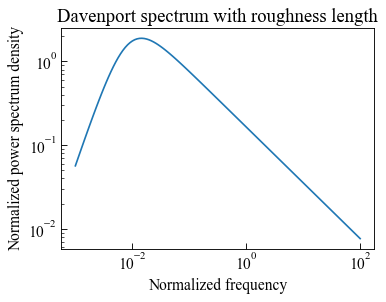

In [38]:
fig, ax = plt.subplots()
plt.xscale("log")
plt.yscale("log")

ax.plot( np.array( dsrnRange ),
         np.array( dsrnResults ) )

ax.tick_params(axis='x', direction="in", length=5)
ax.tick_params(axis='y', direction="in", length=5)
ax.tick_params(axis='x', direction="in", length=3, which='minor')
ax.tick_params(axis='y', direction="in", length=3, which='minor')
ax.set_xlabel( "Normalized frequency" )
ax.set_ylabel( "Normalized power spectrum density" )
ax.set_title( "Davenport spectrum with roughness length" )

plt.tight_layout()
plt.show()

In [39]:
dsrnfRange = [ 10**i for i in np.linspace( -6, 1, num=181 ) ]

In [40]:
uz = 10
dsrnfResults = [ davenportSpectrumWithRoughnessLength( n, uz, normalized=False ) 
                 for n in dsrnfRange ]

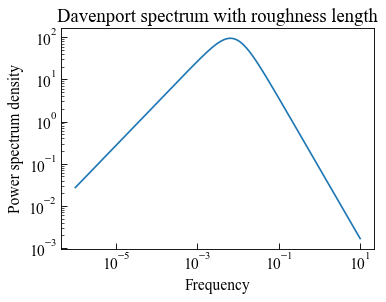

In [41]:
fig, ax = plt.subplots()
plt.xscale("log")
plt.yscale("log")

ax.plot( np.array( dsrnfRange ),
         np.array( dsrnfResults ) )

ax.tick_params(axis='x', direction="in", length=5)
ax.tick_params(axis='y', direction="in", length=5)
ax.tick_params(axis='x', direction="in", length=3, which='minor')
ax.tick_params(axis='y', direction="in", length=3, which='minor')
ax.set_xlabel( "Frequency" )
ax.set_ylabel( "Power spectrum density" )
ax.set_title( "Davenport spectrum with roughness length" )

plt.tight_layout()
plt.show()

### EC1 spectrum

The EC1 spectrum is implemented according to Annex B in BS EN 1991-1-4:2005 Eurocode 1: Actions on structures. 

The wind distribution over frequencies is expressed by the non-dimensional power spectral density function $S_{L}(z,n)$, which should be determined as

$$
S_{L}(z,n) = \frac{nS(z,n)}{\sigma_{v}^{2}} = \frac{6.8 f_{L}(z,n)^{2}}{\left( 1 + f_{L}(z,n)^{2} \right)^{5/3}}
$$

$$
f_{L}(z,n) = \frac{nL(z)}{v_{m}(z)}
$$

where $S(z,n)$ is the one-sided variance spectrum ( $m^2 s^{-2} Hz^{-1}$ ); $f_{L}(z,n)$ is the a non-dimensional frequency determined by the frequency $n$, the natural frequency in $Hz$; $V_{m}$ is the mean velocity ( $m/s$ ); $L(z)$ is the turbulence length scale and is determined as

$$
\begin{aligned}
  L(z) = L_{t} \left( \frac{z}{z_{t}} \right)^{\alpha} \  \text{ for } \  z \geq z_{min} \\
  L(z) = L(z_{min}) \  \text{ for } \  z < z_{min}
\end{aligned}
$$

with a reference height of $z_{t} = 200 \  m$, a reference length scale of $L_{t} = 300 \  m$, and with $\alpha = 0.67 + 0.05 ln(z_{0})$, where the roughness length $z_{0}$ is in $m$. The minimum height $z_{min}$ is given in the following table,


|  Terrain category                                             |  $z_{0}$ (m)  |  $z_{min}$ (m) |
| :----------------------------------------------------------- | :------------- | :------------- | 
| 0 Sea or coastal area exposed to the open sea                | 0.003         | 1      |
| 1 Lakes or flat and horizontal area | 0.01 | 1      |
| 2 Area with low vegetation such as grass and isolated obstacles    | 0.05   | 2      |
| 3 Area with regular cover of vegetation or buildings or with isolated obstacles   | 0.3   | 5      |
| 4 Area in which at least 15 \% of the surface is covered with buildings | 1.0   | 10      |



<!-- |  Terrain category                                             |  $z_{0}$ (m)  |  $z_{min}$ (m) |
| :-----------------------------------------------------------: | :-------------: | :--------------: |
| 0 Sea or coastal area exposed to the open sea                | 0.003         | 1      |
| 1 Lakes or flat and horizontal area with negligible vegetation and without obstacles | 0.01 | 1      |
| 2 Area with low vegetation such as grass and isolated obstacles(trees, buildings) with separations of at least 20 obstacle heights    | 0.05   | 2      |
| 3 Area with regular cover of vegetation or buildings or with isolated obstacles with separations of maximum 20 obstacle heights (such as villages, suburban terrain, permanent forest)    | 0.3   | 5      |
| 4 Area in which at least 15 \% of the surface is covered with buildings and their average height exceeds 15 m  | 1.0   | 10      |
 -->
 
|  Terrain category  |  Description  |
| :------------------------ | :------------- |
| 0  | Sea or coastal area exposed to the open sea      |
| 1  | Lakes or flat and horizontal area with negligible vegetation and without obstacles      |
| 2  | Area with low vegetation such as grass and isolated obstacles(trees, buildings) with separations of at least 20 obstacle heights   |
| 3  | Area with regular cover of vegetation or buildings or with isolated obstacles with separations of maximum 20 obstacle heights (such as villages, suburban terrain, permanent forest)   |
| 4  | Area in which at least 15 \% of the surface is covered with buildings and their average height exceeds 15 m  |

<br/>

Function `ec1Spectrum` implements the spectrum in Eurocode 1.

Reference: 

* EN1991-1-4, 2005. Eurocode 1: Actions on structures.

#### Function help

In [42]:
from ffpack.lsm import ec1Spectrum
help( ec1Spectrum )

Help on function ec1Spectrum in module ffpack.lsm.windSpectra:

ec1Spectrum(n, uz, sigma=0.03, z=10, tcat=0, normalized=True)
    EC1 spectrum is implemented according to Annex B [EN1991-1-42005]_.
    
    Parameters
    ----------
    n: scalar
        Frequency ( Hz ) when normalized=False.
        Normalized frequency when normalized=True.
    uz: scalar
        Mean wind speed ( m/s ) measured at height z.
    sigma: scalar, optional
        Standard derivation of wind.  
    z: scalar, optional
        Height above the ground ( m ), default to 10 m. 
    tcat: scalar, optional
        Terrain category, could be 0, 1, 2, 3, 4
        Default to 0 (sea or coastal area exposed to the open sea) in EC1 Table 4.1.
    normalized: bool, optional
        If normalized is set to False, the power spectrum density will be returned.
    
    Returns
    -------
    rst: scalar
        Power spectrum density ( m^2 s^-2 Hz^-1 ) when normalized=False.
        Normalized power spectrum density w

#### Example with default values

In [43]:
ec1nRange = [ 10**i for i in np.linspace( -3, 2, num=121 ) ]

In [44]:
uz = 10
ec1nResults = [ ec1Spectrum( n, uz, normalized=True ) for n in ec1nRange ]

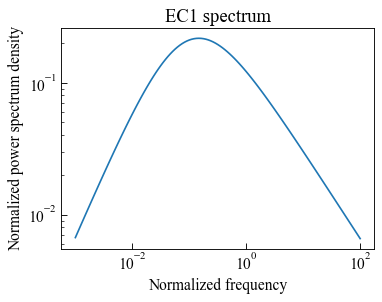

In [45]:
fig, ax = plt.subplots()
plt.xscale("log")
plt.yscale("log")

ax.plot( np.array( ec1nRange ),
         np.array( ec1nResults ) )

ax.tick_params(axis='x', direction="in", length=5)
ax.tick_params(axis='y', direction="in", length=5)
ax.tick_params(axis='x', direction="in", length=3, which='minor')
ax.tick_params(axis='y', direction="in", length=3, which='minor')
ax.set_xlabel( "Normalized frequency" )
ax.set_ylabel( "Normalized power spectrum density" )
ax.set_title( "EC1 spectrum" )

plt.tight_layout()
plt.show()

In [46]:
ec1nfRange = [ 10**i for i in np.linspace( -6, 1, num=181 ) ]

In [47]:
uz = 10
ec1nfResults = [ ec1Spectrum( n, uz, normalized=False ) for n in ec1nfRange ]

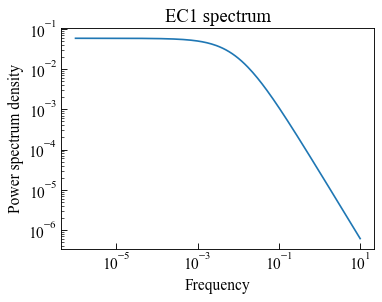

In [48]:
fig, ax = plt.subplots()
plt.xscale("log")
plt.yscale("log")

ax.plot( np.array( ec1nfRange ),
         np.array( ec1nfResults ) )

ax.tick_params(axis='x', direction="in", length=5)
ax.tick_params(axis='y', direction="in", length=5)
ax.tick_params(axis='x', direction="in", length=3, which='minor')
ax.tick_params(axis='y', direction="in", length=3, which='minor')
ax.set_xlabel( "Frequency" )
ax.set_ylabel( "Power spectrum density" )
ax.set_title( "EC1 spectrum" )

plt.tight_layout()
plt.show()

### IEC spectrum

The IEC spectrum is implemented according to IEC 61400-1 (2005), which is a modified version of the Kaimal wind spectrum.

The component power spectral densities are given in non-dimensional form by the equation:

$$
\frac{f S_{k}(f)}{\sigma_{k}^{2}} = \frac{4 f L_{k} / V_{hub} }{\left( 1 + 6 f L_{k} / V_{hub} \right)^{5/3}}
$$

where $f$ is the frequency in $Hz$; $k$ is the index referring to the velocity component direction (i.e. 1 = longitudinal, 2 = lateral, and 3 = upward); $S_{k}$ is the single-sided velocity component spectrum; $\sigma_{k}$ is the velocity component standard deviation; $L_{k}$ is the velocity component integral scale parameter.

The turbulence spectral parameters are given in following table,


|                                 |      $k = 1$       |       $k = 2$        |      $k = 3$       |
| :------------------------------ | :----------------: | :------------------: | :----------------: |
| Standard deviation $\sigma_{k}$ |  $\sigma_{1}$      |  $0.8\sigma_{1}$     | $0.5\sigma_{1}$    |
| Integral scale $L_{k}$          |  $8.1\Lambda_{1}$  |  $2.7\Lambda_{1}$    | $0.66\Lambda_{1}$  |


where $\sigma_{1}$ and $\Lambda_{1}$ are the standard deviation and scale parameters, respectively, of the turbulence. The longitudinal turbulence scale parameter, $\Lambda_{1}$, at hub height $z$ shall be given by 

$$
\begin{aligned}
  \Lambda_{1} = 0.7z \  \text{ for } \  z \leq 60m  \\
  \Lambda_{1} = 42m  \  \text{ for } \  z > 60m
\end{aligned}
$$


The normalized power spectrum density is defined as
$$
\frac{f S_{k}(f)}{\sigma_{k}^{2}}
$$

The normalized frequency is expressed as
$$
\frac{f L_{k} }{ V_{hub} }
$$


Function `iecSpectrum` implements the spectrum in IEC 61400-1.

Reference: 

* IEC, 2005. IEC 61400-1, Wind turbines - Part 1: Design requirements.

#### Function help

In [49]:
from ffpack.lsm import iecSpectrum
help( iecSpectrum )

Help on function iecSpectrum in module ffpack.lsm.windSpectra:

iecSpectrum(f, vhub, sigma=0.03, z=10, k=1, normalized=True)
    IEC spectrum is implemented according to [IEC2005]_.
    
    Parameters
    ----------
    f: scalar
        Frequency ( Hz ) when normalized=False.
        Normalized frequency when normalized=True.
    vhub: scalar
        Mean wind speed ( m/s ).
    sigma: scalar, optional
        Standard derivation of the turblent wind speed component.  
    z: scalar, optional
        Height above the ground ( m ), default to 10 m. 
    k: scalar, optional
        Wind speed direction, could be 1, 2, 3
        ( 1 = longitudinal, 2 = lateral, and 3 = upward )
        Default to 1 (longitudinal).
    normalized: bool, optional
        If normalized is set to False, the power spectrum density will be returned.
    
    Returns
    -------
    rst: scalar
        Single-sided velocity component power spectrum density ( m^2 s^-2 Hz^-1 ) 
        when normalized=False.
   

#### Example with default values

In [50]:
icenRange = [ 10**i for i in np.linspace( -3, 2, num=121 ) ]

In [51]:
vhub = 10
icenResults = [ iecSpectrum( f, vhub, normalized=True ) for f in icenRange ]

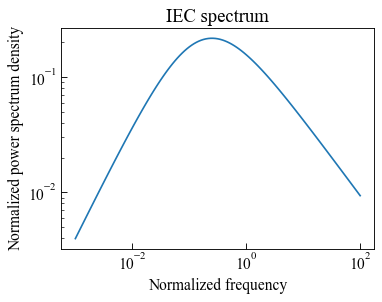

In [52]:
fig, ax = plt.subplots()
plt.xscale("log")
plt.yscale("log")

ax.plot( np.array( icenRange ),
         np.array( icenResults ) )

ax.tick_params(axis='x', direction="in", length=5)
ax.tick_params(axis='y', direction="in", length=5)
ax.tick_params(axis='x', direction="in", length=3, which='minor')
ax.tick_params(axis='y', direction="in", length=3, which='minor')
ax.set_xlabel( "Normalized frequency" )
ax.set_ylabel( "Normalized power spectrum density" )
ax.set_title( "IEC spectrum" )

plt.tight_layout()
plt.show()

In [53]:
iecnfRange = [ 10**i for i in np.linspace( -4, 2, num=141 ) ]

In [54]:
vhub = 10
iecnfResults = [ iecSpectrum( f, vhub, normalized=False ) for f in iecnfRange ]

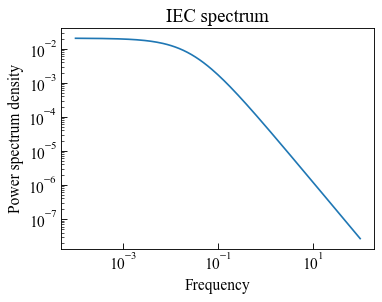

In [55]:
fig, ax = plt.subplots()
plt.xscale("log")
plt.yscale("log")

ax.plot( np.array( iecnfRange ),
         np.array( iecnfResults ) )

ax.tick_params(axis='x', direction="in", length=5)
ax.tick_params(axis='y', direction="in", length=5)
ax.tick_params(axis='x', direction="in", length=3, which='minor')
ax.tick_params(axis='y', direction="in", length=3, which='minor')
ax.set_xlabel( "Frequency" )
ax.set_ylabel( "Power spectrum density" )
ax.set_title( "IEC spectrum" )

plt.tight_layout()
plt.show()

### API spectrum

The API spectrum is implemented according to API Recommended practice 2A-WSD (RP 2A-WSD).

The 1 point wind spectrum for the energy density of the longitudinal wind speed fluctuations can be expressed by

$$
S(f) = \frac{320 \left( \frac{U_0}{10} \right)^{2} \left( \frac{z}{10} \right)^{0.45} }{ \left( 1 + \tilde{f}^{n} \right)^{ \left( \frac{5}{3n} \right) }}
$$

$$
\tilde{f} = 172 f \left( \frac{z}{10} \right)^{2/3} \left( \frac{U_0}{10} \right)^{-0.75} 
$$

where $n=0.468$; $f$ is the frequency ($Hz$); $S(f)$ is the spectral energy density at frequency ($m^2 s^{-2} Hz^{-2}$); $z$ is the height above sea level ($m$); $U_{0}$ is the 1 hour mean wind speed at 10 $m$ above sea level ($m/s$).


Function `apiSpectrum` implements the spectrum in API 2007.

Reference: 

* API, 2007. Recommended practice 2A-WSD (RP 2A-WSD): Recommnded practice for planning, designing and constructing fixed offshore platforms - working stress design.

#### Function help

In [56]:
from ffpack.lsm import apiSpectrum
help( apiSpectrum )

Help on function apiSpectrum in module ffpack.lsm.windSpectra:

apiSpectrum(f, u0, z=10)
    API spectrum is implemented according to [API2007]_.
    
    Parameters
    ----------
    f: scalar
        Frequency ( Hz ).
    u0: scalar
        1 hour mean wind speed ( m/s ) at 10 m above sea level.
    
    Returns
    -------
    rst: scalar
        Power spectrum density ( m^2 s^-2 Hz^-1 ).
    
    Raises
    ------
    ValueError
        If n is not a scalar.
        If uz is not a scalar.
    
    Examples
    --------
    >>> from ffpack.lsm import apiSpectrum
    >>> f = 2
    >>> u0 = 10
    >>> rst = apiSpectrum( f, u0 )
    
    References
    ----------
    .. [API2007] API, 2007. Recommended practice 2A-WSD (RP 2A-WSD): 
       Recommnded practice for planning, designing and constructing fixed offshore 
       platforms - working stress design.



#### Example with default values

In [57]:
apifRange = [ 10**i for i in np.linspace( -6, 2, num=191 ) ]

In [58]:
u0 = 10
apifResults = [ apiSpectrum( f, u0 ) for f in apifRange ]

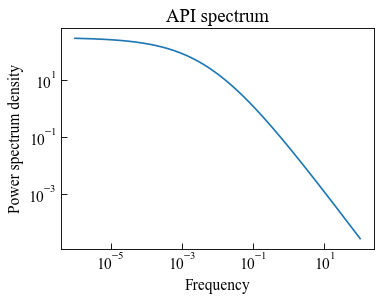

In [59]:
fig, ax = plt.subplots()
plt.xscale("log")
plt.yscale("log")

ax.plot( np.array( apifRange ),
         np.array( apifResults ) )

ax.tick_params(axis='x', direction="in", length=5)
ax.tick_params(axis='y', direction="in", length=5)
ax.tick_params(axis='x', direction="in", length=3, which='minor')
ax.tick_params(axis='y', direction="in", length=3, which='minor')
ax.set_xlabel( "Frequency" )
ax.set_ylabel( "Power spectrum density" )
ax.set_title( "API spectrum" )

plt.tight_layout()
plt.show()

### Wind spectra comparison

In [60]:
wdRange = [ 10**i for i in np.linspace( -3, 2, num=121 ) ]

In [61]:
delta1 = 10
dsnResults = [ davenportSpectrumWithDragCoef( n, delta1, normalized=True )
               for n in wdRange ]

In [62]:
uz = 10
dsrnResults = [ davenportSpectrumWithRoughnessLength( n, uz, normalized=True )
                for n in wdRange ]

In [63]:
uz = 10
ec1nResults = [ ec1Spectrum( n, uz, normalized=True ) for n in wdRange ]

In [64]:
vhub = 10
icenResults = [ iecSpectrum( f, vhub, normalized=True ) for f in wdRange ]

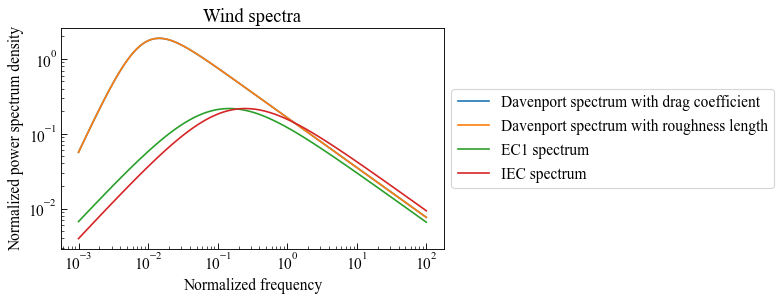

In [65]:
fig, ax = plt.subplots( figsize=(10, 4) )
plt.xscale("log")
plt.yscale("log")

ax.plot( np.array( dsnRange ),
         np.array( dsnResults ),
         label="Davenport spectrum with drag coefficient" )
ax.plot( np.array( dsrnRange ),
         np.array( dsrnResults ),
         label="Davenport spectrum with roughness length" )
ax.plot( np.array( ec1nRange ),
         np.array( ec1nResults ),
         label="EC1 spectrum" )
ax.plot( np.array( icenRange ),
         np.array( icenResults ),
         label="IEC spectrum" )


ax.tick_params(axis='x', direction="in", length=5)
ax.tick_params(axis='y', direction="in", length=5)
ax.tick_params(axis='x', direction="in", length=3, which='minor')
ax.tick_params(axis='y', direction="in", length=3, which='minor')
ax.set_xlabel( "Normalized frequency" )
ax.set_ylabel( "Normalized power spectrum density" )
ax.set_title( "Wind spectra" )

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

## Cycle counting matrix

### ASTM simple range counting matrix

#### Function help

In [66]:
from ffpack.lsm import astmSimpleRangeCountingMatrix
help( astmSimpleRangeCountingMatrix )

Help on function astmSimpleRangeCountingMatrix in module ffpack.lsm.cycleCountingMatrix:

astmSimpleRangeCountingMatrix(data, resolution=0.5)
    Calculate ASTM simple range counting matrix.
    
    Parameters
    ----------
    data: 1d array
        Sequence data to calculate range counting matrix.
    resolution: bool, optional
        The desired resolution to round the data points.
    
    Returns
    -------
    rst: 2d array
        A matrix contains the counting results.
    matrixIndexKey: 1d array
        A sorted array contains the index keys for the counting matrix.
    
    Raises
    ------
    ValueError
        If the data dimension is not 1.
        If the data length is less than 2.
    
    Notes
    -----
    The default round function will round half to even: 1.5, 2.5 => 2.0.
    
    Examples
    --------
    >>> from ffpack.lsm import astmSimpleRangeCountingMatrix
    >>> data = [ -2.0, 1.0, -3.0, 5.0, -1.0, 3.0, -4.0, 4.0, -2.0 ]
    >>> rst, matrixIndexKey = 

#### Example with default values

In [67]:
asrcmData = [ -2.0, 1.0, -3.0, 5.0, -1.0, 3.0, -4.0, 4.0, -2.0 ]
asrcmMat, asrcmIndex = astmSimpleRangeCountingMatrix( asrcmData )

asrcmMat = np.array( asrcmMat )
asrcmIndex = np.array( asrcmIndex ).astype( float )

In [68]:
print( "ASTM simple range counting matrix" )
print( asrcmMat )
print()
print( "Matrix index" )
print( asrcmIndex )

ASTM simple range counting matrix
[[0.  0.  0.  0.  0.  0.  0.5 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0.5 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.5 0.  0. ]
 [0.  0.5 0.  0.  0.  0.  0.  0. ]
 [0.5 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.5 0.  0.  0.  0. ]]

Matrix index
[-4. -3. -2. -1.  1.  3.  4.  5.]


<Figure size 400x320 with 0 Axes>

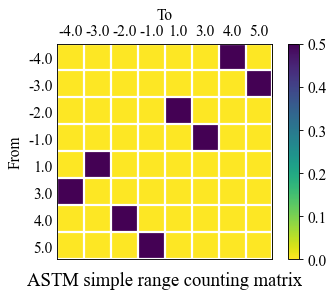

In [69]:
plt.set_cmap( "viridis_r" )
fig, ax = plt.subplots()

cax = ax.matshow( asrcmMat )

ax.tick_params( axis='x', direction="in", length=5, top=False, bottom=False )
ax.tick_params( axis='y', direction="in", length=5, left=False, right=False )
ax.tick_params( axis='x', which="minor", top=False, bottom=False )
ax.tick_params( axis='y', which="minor", left=False, right=False )
ax.set_xticklabels( [ '' ] + asrcmIndex.tolist() )
ax.set_yticklabels( [ '' ] + asrcmIndex.tolist() )
ax.set_xticks( np.arange( -.5, len( asrcmIndex ), 1 ), minor=True )
ax.set_yticks( np.arange( -.5, len( asrcmIndex ), 1 ), minor=True )
ax.grid( which="minor", color='w', linestyle='-', linewidth=2 )
ax.set_ylabel( "From" )
ax.set_xlabel( "To" )
ax.xaxis.set_label_position( "top" )
ax.set_title( "ASTM simple range counting matrix", y=-0.15 )

fig.colorbar(cax)
plt.tight_layout()
plt.show()

### ASTM range pair counting matrix

#### Function help

In [70]:
from ffpack.lsm import astmRangePairCountingMatrix
help( astmRangePairCountingMatrix )

Help on function astmRangePairCountingMatrix in module ffpack.lsm.cycleCountingMatrix:

astmRangePairCountingMatrix(data, resolution=0.5)
    Calculate ASTM range pair counting matrix.
    
    Parameters
    ----------
    data: 1d array
        Sequence data to calculate range pair counting matrix.
    resolution: bool, optional
        The desired resolution to round the data points.
    
    Returns
    -------
    rst: 2d array
        A matrix contains the counting results.
    matrixIndexKey: 1d array
        A sorted array contains the index keys for the counting matrix.
    
    Raises
    ------
    ValueError
        If the data dimension is not 1.
        If the data length is less than 2.
    
    Notes
    -----
    The default round function will round half to even: 1.5, 2.5 => 2.0:
    
    Examples
    --------
    >>> from ffpack.lsm import astmRangePairCountingMatrix
    >>> data = [ -2.0, 1.0, -3.0, 5.0, -1.0, 3.0, -4.0, 4.0, -2.0 ]
    >>> rst, matrixIndexKey = ast

#### Example with default values

In [71]:
arpcmData = [ -2.0, 1.0, -3.0, 5.0, -1.0, 3.0, -4.0, 4.0, -2.0 ]
arpcmMat, arpcmIndex = astmRangePairCountingMatrix( arpcmData )

arpcmMat = np.array( arpcmMat )
arpcmIndex = np.array( arpcmIndex ).astype( float )

In [72]:
print( "ASTM range pair counting matrix" )
print( arpcmMat )
print()
print( "Matrix index" )
print( arpcmIndex )

ASTM range pair counting matrix
[[0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]

Matrix index
[-3. -2. -1.  1.  3.  4.  5.]


<Figure size 400x320 with 0 Axes>

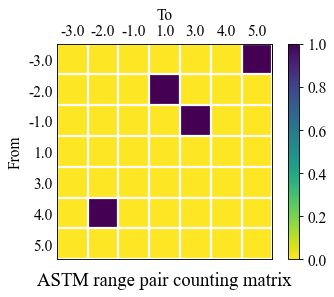

In [73]:
plt.set_cmap( "viridis_r" )
fig, ax = plt.subplots()

cax = ax.matshow( arpcmMat )

ax.tick_params( axis='x', direction="in", length=5, top=False, bottom=False )
ax.tick_params( axis='y', direction="in", length=5, left=False, right=False )
ax.tick_params( axis='x', which="minor", top=False, bottom=False )
ax.tick_params( axis='y', which="minor", left=False, right=False )
ax.set_xticklabels( [ '' ] + arpcmIndex.tolist() )
ax.set_yticklabels( [ '' ] + arpcmIndex.tolist() )
ax.set_xticks( np.arange( -.5, len( arpcmIndex ), 1 ), minor=True )
ax.set_yticks( np.arange( -.5, len( arpcmIndex ), 1 ), minor=True )
ax.grid( which="minor", color='w', linestyle='-', linewidth=2 )
ax.set_ylabel( "From" )
ax.set_xlabel( "To" )
ax.xaxis.set_label_position( "top" )
ax.set_title( "ASTM range pair counting matrix", y=-0.15 )

fig.colorbar(cax)
plt.tight_layout()
plt.show()

### ASTM rainflow counting matrix

#### Function help

In [74]:
from ffpack.lsm import astmRainflowCountingMatrix
help( astmRainflowCountingMatrix )

Help on function astmRainflowCountingMatrix in module ffpack.lsm.cycleCountingMatrix:

astmRainflowCountingMatrix(data, resolution=0.5)
    Calculate ASTM rainflow counting matrix.
    
    Parameters
    ----------
    data: 1d array
        Sequence data to calculate rainflow counting matrix.
    resolution: bool, optional
        The desired resolution to round the data points.
    
    Returns
    -------
    rst: 2d array
        A matrix contains the counting results.
    matrixIndexKey: 1d array
        A sorted array contains the index keys for the counting matrix.
       
    Raises
    ------
    ValueError
        If the data dimension is not 1.
        If the data length is less than 2.
    
    Notes
    -----
    The default round function will round half to even: 1.5, 2.5 => 2.0:
    
    Examples
    --------
    >>> from ffpack.lsm import astmRainflowCountingMatrix
    >>> data = [ -2.0, 1.0, -3.0, 5.0, -1.0, 3.0, -4.0, 4.0, -2.0 ]
    >>> rst, matrixIndexKey = astmRai

#### Example with default values

In [75]:
arcmData = [ -2.0, 1.0, -3.0, 5.0, -1.0, 3.0, -4.0, 4.0, -2.0 ]
arcmMat, arcmIndex = astmRainflowCountingMatrix( arcmData )

arcmMat = np.array( arcmMat )
arcmIndex = np.array( arcmIndex ).astype( float )

In [76]:
print( "ASTM rainflow counting matrix" )
print( arcmMat )
print()
print( "Matrix index" )
print( arcmIndex )

ASTM rainflow counting matrix
[[0.  0.  0.  0.  0.  0.  0.5 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0.5 0.  0.  0. ]
 [0.  0.  0.  0.  0.  1.  0.  0. ]
 [0.  0.5 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.  0.  0.  0.  0. ]
 [0.5 0.  0.  0.  0.  0.  0.  0. ]]

Matrix index
[-4. -3. -2. -1.  1.  3.  4.  5.]


<Figure size 400x320 with 0 Axes>

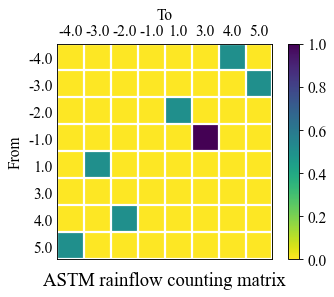

In [77]:
plt.set_cmap( "viridis_r")
fig, ax = plt.subplots()

cax = ax.matshow( arcmMat )

ax.tick_params( axis='x', direction="in", length=5, top=False, bottom=False )
ax.tick_params( axis='y', direction="in", length=5, left=False, right=False )
ax.tick_params( axis='x', which="minor", top=False, bottom=False )
ax.tick_params( axis='y', which="minor", left=False, right=False )
ax.set_xticklabels( [ '' ] + arcmIndex.tolist() )
ax.set_yticklabels( [ '' ] + arcmIndex.tolist() )
ax.set_xticks( np.arange( -.5, len( arcmIndex ), 1 ), minor=True )
ax.set_yticks( np.arange( -.5, len( arcmIndex ), 1 ), minor=True )
ax.grid( which="minor", color='w', linestyle='-', linewidth=2 )
ax.set_ylabel( "From" )
ax.set_xlabel( "To" )
ax.xaxis.set_label_position( "top" )
ax.set_title( "ASTM rainflow counting matrix", y=-0.15 )

fig.colorbar( cax )
plt.tight_layout()
plt.show()

### ASTM rainflow counting matrix for repeating histories

#### Function help

In [78]:
from ffpack.lsm import astmRainflowRepeatHistoryCountingMatrix
help( astmRainflowRepeatHistoryCountingMatrix )

Help on function astmRainflowRepeatHistoryCountingMatrix in module ffpack.lsm.cycleCountingMatrix:

astmRainflowRepeatHistoryCountingMatrix(data, resolution=0.5)
    Calculate ASTM simplified rainflow counting matrix for repeating histories.
    
    Parameters
    ----------
    data: 1d array
        Sequence data to calculate simplified rainflow counting matrix 
        for repeating histories.
    resolution: bool, optional
        The desired resolution to round the data points.
    
    Returns
    -------
    rst: 2d array
        A matrix contains the counting results.
    matrixIndexKey: 1d array
        A sorted array contains the index keys for the counting matrix.
    
    Raises
    ------
    ValueError
        If the data dimension is not 1.
        If the data length is less than 2.
    
    Notes
    -----
    The default round function will round half to even: 1.5, 2.5 => 2.0:
    
    Examples
    --------
    >>> from ffpack.lsm import astmRainflowRepeatHistoryCount

#### Example with default values

In [79]:
arrhcmData = [ -2.0, 1.0, -3.0, 5.0, -1.0, 3.0, -4.0, 4.0, -2.0 ]
arrhcmMat, arrhcmIndex = astmRainflowRepeatHistoryCountingMatrix( arrhcmData )

arrhcmMat = np.array( arrhcmMat )
arrhcmIndex = np.array( arrhcmIndex ).astype( float )

In [80]:
print( "ASTM rainflow counting matrix for repeating histories" )
print( arrhcmMat )
print()
print( "Matrix index" )
print( arrhcmIndex )

ASTM rainflow counting matrix for repeating histories
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]]

Matrix index
[-4. -3. -2. -1.  1.  3.  4.  5.]


<Figure size 400x320 with 0 Axes>

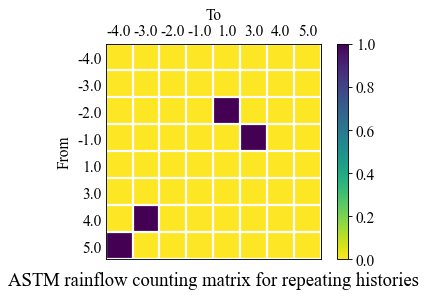

In [81]:
plt.set_cmap( "viridis_r")
fig, ax = plt.subplots()

cax = ax.matshow( arrhcmMat )

ax.tick_params( axis='x', direction="in", length=5, top=False, bottom=False )
ax.tick_params( axis='y', direction="in", length=5, left=False, right=False )
ax.tick_params( axis='x', which="minor", top=False, bottom=False )
ax.tick_params( axis='y', which="minor", left=False, right=False )
ax.set_xticklabels( [ '' ] + arrhcmIndex.tolist() )
ax.set_yticklabels( [ '' ] + arrhcmIndex.tolist() )
ax.set_xticks( np.arange( -.5, len( arrhcmIndex ), 1 ), minor=True )
ax.set_yticks( np.arange( -.5, len( arrhcmIndex ), 1 ), minor=True )
ax.grid( which="minor", color='w', linestyle='-', linewidth=2 )
ax.set_ylabel( "From" )
ax.set_xlabel( "To" )
ax.xaxis.set_label_position( "top" )
ax.set_title( "ASTM rainflow counting matrix for repeating histories", y=-0.15 )

fig.colorbar( cax )
plt.tight_layout()
plt.show()

### Johannesson min max counting matrix

#### Function help

In [82]:
from ffpack.lsm import johannessonMinMaxCountingMatrix
help( johannessonMinMaxCountingMatrix )

Help on function johannessonMinMaxCountingMatrix in module ffpack.lsm.cycleCountingMatrix:

johannessonMinMaxCountingMatrix(data, resolution=0.5)
    Calculate Johannesson minMax cycle counting matrix.
    
    Parameters
    ----------
    data: 1d array
        Sequence data to calculate rainflow counting matrix.
    resolution: bool, optional
        The desired resolution to round the data points.
    
    Returns
    -------
    rst: 2d array
        A matrix contains the counting results.
    matrixIndexKey: 1d array
        A sorted array contains the index keys for the counting matrix.
    
    Raises
    ------
    ValueError
        If the data dimension is not 1.
        If the data length is less than 2.
    
    Notes
    -----
    The default round function will round half to even: 1.5, 2.5 => 2.0:
    
    Examples
    --------
    >>> from ffpack.lsm import johannessonMinMaxCountingMatrix
    >>> data = [ -2.0, 1.0, -3.0, 5.0, -1.0, 3.0, -4.0, 4.0, -2.0 ]
    >>> rst, m

#### Example with default values

In [83]:
jmmcmData = [ -2.0, 1.0, -3.0, 5.0, -1.0, 3.0, -4.0, 4.0, -2.0 ]
jmmcmMat, jmmcmIndex = johannessonMinMaxCountingMatrix( jmmcmData )

jmmcmMat = np.array( jmmcmMat )
jmmcmIndex = np.array( jmmcmIndex ).astype( float )

In [84]:
print( "Rychlik rainflow counting matrix" )
print( jmmcmMat )
print()
print( "Matrix index" )
print( jmmcmIndex )

Rychlik rainflow counting matrix
[[0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]

Matrix index
[-4. -3. -2. -1.  1.  3.  4.  5.]


<Figure size 400x320 with 0 Axes>

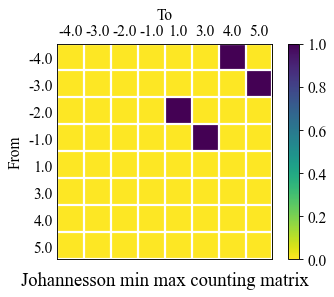

In [85]:
plt.set_cmap( "viridis_r" )
fig, ax = plt.subplots()

cax = ax.matshow( jmmcmMat )

ax.tick_params( axis='x', direction="in", length=5, top=False, bottom=False )
ax.tick_params( axis='y', direction="in", length=5, left=False, right=False )
ax.tick_params( axis='x', which="minor", top=False, bottom=False )
ax.tick_params( axis='y', which="minor", left=False, right=False )
ax.set_xticklabels( [ '' ] + jmmcmIndex.tolist() )
ax.set_yticklabels( [ '' ] + jmmcmIndex.tolist() )
ax.set_xticks( np.arange( -.5, len( jmmcmIndex ), 1 ), minor=True )
ax.set_yticks( np.arange( -.5, len( jmmcmIndex ), 1 ), minor=True )
ax.grid( which="minor", color='w', linestyle='-', linewidth=2 )
ax.set_ylabel( "From" )
ax.set_xlabel( "To" )
ax.xaxis.set_label_position( "top" )
ax.set_title( "Johannesson min max counting matrix", y=-0.15 )

fig.colorbar( cax )
plt.tight_layout()
plt.show()

### Rychlik rainflow counting matrix

#### Function help

In [86]:
from ffpack.lsm import rychlikRainflowCountingMatrix
help( rychlikRainflowCountingMatrix )

Help on function rychlikRainflowCountingMatrix in module ffpack.lsm.cycleCountingMatrix:

rychlikRainflowCountingMatrix(data, resolution=0.5)
    Calculate Rychlik rainflow counting matrix.
    
    Parameters
    ----------
    data: 1d array
        Sequence data to calculate rainflow counting matrix.
    resolution: bool, optional
        The desired resolution to round the data points.
    
    Returns
    -------
    rst: 2d array
        A matrix contains the counting results.
    matrixIndexKey: 1d array
        A sorted array contains the index keys for the counting matrix.
    
    Raises
    ------
    ValueError
        If the data dimension is not 1.
        If the data length is less than 2.
    
    Notes
    -----
    The default round function will round half to even: 1.5, 2.5 => 2.0:
    
    Examples
    --------
    >>> from ffpack.lsm import rychlikRainflowCountingMatrix
    >>> data = [ -2.0, 1.0, -3.0, 5.0, -1.0, 3.0, -4.0, 4.0, -2.0 ]
    >>> rst, matrixIndexKey 

#### Example with default values

In [87]:
rrcmData = [ -2.0, 1.0, -3.0, 5.0, -1.0, 3.0, -4.0, 4.0, -2.0 ]
rrcmMat, rrcmIndex = rychlikRainflowCountingMatrix( rrcmData )

rrcmMat = np.array( rrcmMat )
rrcmIndex = np.array( rrcmIndex ).astype( float )

In [88]:
print( "Rychlik rainflow counting matrix" )
print( rrcmMat )
print()
print( "Matrix index" )
print( rrcmIndex )

Rychlik rainflow counting matrix
[[0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]

Matrix index
[-3. -2. -1.  1.  3.  4.  5.]


<Figure size 400x320 with 0 Axes>

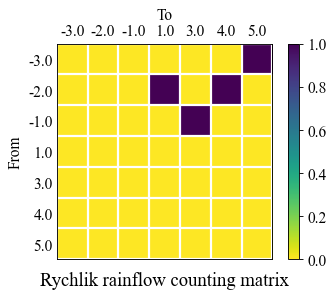

In [89]:
plt.set_cmap( "viridis_r" )
fig, ax = plt.subplots()

cax = ax.matshow( rrcmMat )

ax.tick_params( axis='x', direction="in", length=5, top=False, bottom=False )
ax.tick_params( axis='y', direction="in", length=5, left=False, right=False )
ax.tick_params( axis='x', which="minor", top=False, bottom=False )
ax.tick_params( axis='y', which="minor", left=False, right=False )
ax.set_xticklabels( [ '' ] + rrcmIndex.tolist() )
ax.set_yticklabels( [ '' ] + rrcmIndex.tolist() )
ax.set_xticks( np.arange( -.5, len( rrcmIndex ), 1 ), minor=True )
ax.set_yticks( np.arange( -.5, len( rrcmIndex ), 1 ), minor=True )
ax.grid( which="minor", color='w', linestyle='-', linewidth=2 )
ax.set_ylabel( "From" )
ax.set_xlabel( "To" )
ax.xaxis.set_label_position( "top" )
ax.set_title( "Rychlik rainflow counting matrix", y=-0.15 )

fig.colorbar( cax )
plt.tight_layout()
plt.show()